Goal: Filtering the dataset to formulate a explicit research question

In [3]:
# load packages
import pandas as pd
import os
import numpy as np
import seaborn as sns
from tabulate import tabulate # package install: sudo apt install python3-tabulate


In [4]:
# load csv (comma-separated values) or tsv (tab-separated values)/ other types for even less memory use

# good to knows
df = pd.read_csv("../data/ab_ag.tsv", sep="\t")
df.head() # shows head 5 rows can be index
df.tail() # shows tail 5 rows can be index
df.columns # shows all column names
df.index # How many rows
df.index.tolist() # tolist creates List
df.info() # useful info columns, Dtype, memory
df.describe() # mean, sd
df["organism"].unique
df.shape 
df.size
#...further -> mirgation to pandas_tutorial...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5523 entries, 0 to 5522
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pdb               5523 non-null   object 
 1   Hchain            5481 non-null   object 
 2   Lchain            5344 non-null   object 
 3   model             5523 non-null   int64  
 4   antigen_chain     5490 non-null   object 
 5   antigen_type      5490 non-null   object 
 6   antigen_het_name  694 non-null    object 
 7   antigen_name      5490 non-null   object 
 8   short_header      5520 non-null   object 
 9   date              5523 non-null   object 
 10  compound          5523 non-null   object 
 11  organism          5522 non-null   object 
 12  heavy_species     5466 non-null   object 
 13  light_species     4938 non-null   object 
 14  antigen_species   5471 non-null   object 
 15  authors           5523 non-null   object 
 16  resolution        5523 non-null   float64


165690

First look, what to clean up, what to explore?


Get rid of empty columns -> Annika
Get rid of outliers


In [5]:
# Copy of data_clean.py up
# 1. Übersicht über Spalten

# Berechnung Anzahl NA pro Spalte 
na_counts = df.isna().sum()
# Ausgabe NA-Anzahl
print("Anzahl fehlender Werte pro Spalte:")
print(na_counts)

#Berechnung Prozent NA pro Spalte 
na_percent = (na_counts / len(df)) * 100
print("Prozentanzahl NA pro Spalte:")
print(na_percent)



#2. Löschen von NA-Spalten 

# Umwandlung None in NA 

df = df.replace({None: np.nan})

# Löschung erfolgt nur wenn mind. 85% NA
min_non_na_ratio = 0.15

# Berechnung absolute Mindestzahl NA
min_non_na_count = int(len(df) * min_non_na_ratio)

# Spalten über dem Wert löschen 
df_clean = df.dropna(axis=1, thresh=min_non_na_count)

# Speichern als neue .tsv Datei 
df_clean.to_csv("bereinigt.tsv", sep="\t", index=False)

# Ausgabe in Terminal 
print(df_clean)


#3. Überischt Tabelle df_clean.tsv erstellen

# Als Markdown-Tabelle exportieren
with open("df_clean.tsv", "w") as f:
    f.write(tabulate(df_clean, headers='keys', tablefmt='github'))

Anzahl fehlender Werte pro Spalte:
pdb                    0
Hchain                42
Lchain               179
model                  0
antigen_chain         33
antigen_type          33
antigen_het_name    4829
antigen_name          33
short_header           3
date                   0
compound               0
organism               1
heavy_species         57
light_species        585
antigen_species       52
authors                0
resolution             0
method                 0
r_free              2702
r_factor            2702
scfv                   0
engineered             0
heavy_subclass        40
light_subclass       179
light_ctype          179
affinity            5381
delta_g             5398
affinity_method     5381
temperature         5443
pmid                5401
dtype: int64
Prozentanzahl NA pro Spalte:
pdb                  0.000000
Hchain               0.760456
Lchain               3.240992
model                0.000000
antigen_chain        0.597501
antigen_type         0.

Analysis of columns for selecting a group of data 

*marked as interesting

antigen_name
short_header for exp. VIRAL PROTEIN
compound for exp. only Cryo-EM structures
*organism:
    create list of all organism
heavy_species and light_species 
    uninteresting mainly homo sapiens: code for that
*antigen species
    create list of all species
    how many rows has each species and advanced filtering
authors
    maybe later for deeper analysis
*resolution
    data with simular resolution 
    remove rows with useless resolution !Is there data with useless resolution
*method
    mabye but better focus on specific organism

Last need to be understood first

r_free 
r_factor
scfv
engineerd
heavy_subclass
light_subclass
light_ctype


In [16]:
# Taking a look on organisms

# creating a list of all organism
organism = df_clean["organism"].tolist()

# exluding muliples by iteration
organism_nomuliples = []
for i in organism:
  if i not in organism_nomuliples:
    organism_nomuliples.append(i)

# * with sep prints each element after one another
print(*organism_nomuliples, sep="\n")

# how many different organism types
print(f"There are {len(organism_nomuliples)} different combinations/types of organisms")




Homo sapiens; Influenza A virus
Homo sapiens; Mus musculus
Homo sapiens; Severe acute respiratory syndrome coronavirus
Homo sapiens
Homo sapiens; Severe acute respiratory syndrome coronavirus 2
Homo sapiens; SYNTHETIC CONSTRUCT
Homo sapiens; Plasmodium falciparum 3D7
Homo sapiens; Staphylococcus aureus
Homo sapiens; Thermotoga maritima
Dendraspis polylepis polylepis; Homo sapiens
Homo sapiens; Norovirus Hu/GII.4/Sydney/NSW0514/2012/AU
Canis lupus familiaris; Homo sapiens
Bos taurus; Homo sapiens
dengue virus type 2; Homo sapiens
Homo sapiens; Severe acute respiratory syndrome coronavirus 2; synthetic construct; Tequatrovirus T4
Homo sapiens; Human immunodeficiency virus 1
Homo sapiens; Streptococcus sp. 'group G'
Homo sapiens; Influenza A virus (A/California/04/2009(H1N1))
Homo sapiens; Rattus norvegicus
Homo sapiens; Severe fever with thrombocytopenia syndrome virus
Escherichia coli; Homo sapiens
Arachis hypogaea; Homo sapiens
Homo sapiens; Severe acute respiratory syndrome-related co

Next step: Sum of rows corresponding to a organism type for subtype selecting


In [ ]:
# nesessary for pattern
import re

# creat df from list
df_organism_sum = pd.DataFrame(organism_nomuliples, columns=['Name'])

# Counting list corresponding to organism_nomuliples (list), to be added to the df later
counts = []
# Creat counting list corresponding to organism_nomuliples (list), to be added to the df later
# iteration over the list of keywords
# re.escape to deleted unwanted patterns from the strings (TODO What exactly happens!)
# count contains the sum of rows of a subtype in organism_nomuliples (is iterating)
# adding each count into the list counts

# pd.notna(x) filtern der NaNs; str(x) jedes Element ist ein string
organism_nomuliples = [str(x) for x in organism_nomuliples if pd.notna(x)]

for keyword in organism_nomuliples:
    pattern = re.escape(keyword)
    count = df_clean["organism"].astype(str).str.count(pattern).sum()
    counts.append(count)

print(counts)

# adds a column to df for the SUMs
# lenght of List counts and lenght of df must be equal
print(len(counts))
print(len(organism_nomuliples))
df_organism_sum["SUM"] = counts

# check result
df_organism_sum.head

[186, 10, 902, 2426, 869, 63, 24, 4, 25, 2, 1, 1, 8, 9, 17, 152, 2, 1, 7, 2, 26, 17, 6, 28, 5, 4, 4, 15, 5, 14, 1, 2, 2, 4, 1, 1, 127, 1, 3, 17, 3, 1, 2, 2, 1, 4, 5, 9, 8, 1, 24, 2, 4, 1, 8, 2, 1, 4, 1, 3, 6, 2, 1, 1, 3, 6, 6, 2, 1, 3, 3, 4, 2, 2, 2, 1, 13, 4, 6, 1, 3, 5, 6, 5, 1, 21, 3, 2, 3, 3, 26, 8, 3, 7, 2, 10, 2, 2, 1, 6, 1, 3, 4, 2, 8, 1, 3, 3, 2, 1, 2, 1, 1, 1, 4, 4, 1, 2, 1, 7, 1, 12, 10, 1, 7, 1, 1, 45, 3, 5, 1, 12, 2, 1, 1, 10, 4, 5, 2, 3, 2, 2, 1, 1, 1, 2, 1, 4, 11, 10, 1, 3, 1, 2, 1, 5, 614, 9, 292, 3099, 3, 24, 108, 8, 242, 11, 4, 81, 8, 8, 3, 99, 16, 28, 13, 91, 3, 32, 12, 3, 10, 4, 7, 2, 3, 8, 8, 6, 14, 9, 19, 2, 10, 60, 20, 4, 6, 2, 2, 2, 3, 7, 4, 3, 2, 10, 4, 8, 2, 3, 3, 4, 15, 2, 8, 3, 6, 6, 1, 1, 5, 3, 3, 18, 1, 4, 8, 3, 1, 4, 1, 2, 19, 2, 4, 2, 10, 20, 4, 2, 5, 2, 4, 2, 3, 18, 7, 1, 2, 5, 3, 5, 3, 3, 1, 2, 2, 4, 2, 4, 4, 4, 6, 3, 2, 2, 7, 1, 3, 5, 3, 8, 3, 4, 1, 4, 3, 4, 1, 7, 1, 4, 7, 6, 2, 6, 1, 4, 20, 2, 3, 4, 3, 6, 1, 2, 2, 1, 2, 1, 1, 8, 7, 3, 2, 1, 3, 1, 2, 8

<bound method NDFrame.head of                                                   Name   SUM
0                      Homo sapiens; Influenza A virus   186
1                           Homo sapiens; Mus musculus    10
2    Homo sapiens; Severe acute respiratory syndrom...   902
3                                         Homo sapiens  2426
4    Homo sapiens; Severe acute respiratory syndrom...   869
..                                                 ...   ...
407  INFLUENZA A VIRUS (A/SWINE/MINNESOTA/A01134337...     1
408                   YELLOW FEVER VIRUS; HOMO SAPIENS     1
409  INFLUENZA A VIRUS (A/BREVIG MISSION/1/1918(H1N...     1
410   BAT SARS-LIKE CORONAVIRUS RSSHC014; HOMO SAPIENS     1
411  ZIKA VIRUS (ISOLATE ZIKV/HUMAN/FRENCH POLYNESI...     1

[412 rows x 2 columns]>

Potential sub datasets

 Homosapiens, 
Homo sapiens -> 2426
Influenza A virus -> 186
SARS Cov. 1 -> 902
SARS Cov. 2 -> 869
    -> how to show the whole output!!! 
    -> coordinate with other groups

# GOAL barplot and heatmap for genfamily and antigen name

In [11]:
# Taking a look on organisms

# creating a list of all organism
ant_name = df_clean["antigen_name"].tolist()

# exluding muliples by iteration
ant_name_nomuliples = []
for i in ant_name:
  if i not in ant_name_nomuliples:
    ant_name_nomuliples.append(i)

# * with sep prints each element after one another
print(*ant_name_nomuliples, sep="\n")

# how many different organism types
print(f"There are {len(ant_name_nomuliples)} different combinations/types of antigen_names")




hemagglutinin ha2 chain | hemagglutinin ha1 chai
stem_mimetic_01
hemagglutinin
spike glycoprotein
neuraminidase
hemagglutinin ha2 chain | hemagglutinin ha1 chain
guanine nucleotide-binding protein g(i) subunit alpha-1 | guanine nucleotide-binding protein g(i)/g(s)/g(t) subunitbeta-1 
spike protein s1
h1h5 ha
h1h3 ha
protein-glutamine gamma-glutamyltransferase e
gametocyte surface protein p45/48
enterotoxin type b
hemagglutinin ha1 chain
apical membrane antigen 1
spike protein s1 | spike protein s1
mitochondrial pyruvate carrier 2
cobalt/magnesium transport protein cora | cobalt/magnesium transport protein cora
soluble cytochrome b562,apelin receptor
short neurotoxin 1
unknown
vp1
major allergen can f 1
g protein subunit alpha i1 | guanine nucleotide-binding protein g(i)/g(s)/g(t) subunitbeta-1 
envelope protein
spike glycoprotein,fibritin,spike glycoprotein,fibritin,spike glycoprotein,fibritin,expression tag 
spike glycoprotein,fibritin,expression tag
5'-nucleotidase
hiv-1 bg505 ds-sos

In [54]:
# nesessary for pattern
import re

# creat df from list
df_ant_name_sum = pd.DataFrame(ant_name_nomuliples, columns=['antigen_name'])

# Counting list corresponding to organism_nomuliples (list), to be added to the df later
counts = []
# Creat counting list corresponding to organism_nomuliples (list), to be added to the df later
# iteration over the list of keywords
# re.escape to deleted unwanted patterns from the strings (TODO What exactly happens!)
# count contains the sum of rows of a subtype in organism_nomuliples (is iterating)
# adding each count into the list counts
ant_name_nomuliples = [str(x) for x in ant_name_nomuliples if pd.notna(x)]

for keyword in ant_name_nomuliples:
    pattern = re.escape(keyword)
    count = df_clean["antigen_name"].astype(str).str.count(pattern).sum()
    counts.append(count)

print(counts)

# adds a column to df for the SUMs
# lenght of List counts and lenght of df must be equal
print(len(counts))
print(len(ant_name_nomuliples))
df_ant_name_sum["SUM"] = counts

# check result
df_ant_name_sum.head

[48, 2, 556, 1245, 116, 44, 89, 529, 1, 1, 8, 6, 1, 82, 3, 3, 3, 24, 5, 1, 98, 20, 1, 2, 65, 3, 21, 9, 9, 12, 64, 3, 2, 20, 7, 15, 4, 1, 4, 1, 15, 20, 1, 6, 3, 9, 8, 1, 3, 2, 6, 6, 5, 54, 2, 1, 2, 1, 5, 13, 2, 12, 4, 24, 1, 8, 8, 1, 1, 2, 1, 2072, 1, 6, 7, 21, 2, 3, 1, 1, 3, 34, 2, 2, 11, 1, 1, 1, 3, 6, 1, 1, 1, 6, 1, 1, 2, 17, 2, 50, 1, 403, 1, 1, 1, 22, 35, 90, 3, 11, 1, 3, 3, 9, 2, 12, 1, 1, 1, 10, 39, 35, 142, 6, 7, 1, 6, 1, 8, 1, 4, 14, 5, 1, 1, 1, 2, 2, 1, 1, 13, 12, 3, 1, 39, 1, 4, 1, 1, 1, 2, 14, 2, 579, 1, 1, 1, 1, 2, 85, 1, 3, 55, 4, 3, 1, 2, 21, 1, 3, 4, 63, 1, 2, 2, 4, 1, 16, 4, 1, 3, 1, 12, 8, 4, 1, 1, 3, 16, 146, 52, 1, 8, 2, 1, 1, 4, 1, 2, 31, 2, 1, 1, 1, 3, 1, 4, 2, 2, 9, 6, 3, 1, 9, 3, 3, 4, 5, 2, 1, 2, 1, 12, 1, 1, 2, 2, 1, 1, 13, 3, 1, 3, 3, 2, 1, 5, 1, 2, 3, 3, 13, 2, 8, 81, 3, 2, 7, 3, 1, 4, 2, 1, 3, 1, 1, 6, 1, 1, 1, 6, 6, 5, 2, 1, 9, 2, 5, 3, 1, 1, 2, 23, 49, 1, 1, 20, 3, 4, 1, 3, 1, 2, 13, 3, 1, 3, 28, 2, 2, 6, 21, 3, 12, 3, 5, 2, 1, 6, 12, 2, 1, 2, 1, 1, 2, 1, 

<bound method NDFrame.head of                                           antigen_name   SUM
0     hemagglutinin ha2 chain | hemagglutinin ha1 chai    48
1                                      stem_mimetic_01     2
2                                        hemagglutinin   556
3                                   spike glycoprotein  1245
4                                        neuraminidase   116
..                                                 ...   ...
803               lipoprot_c domain-containing protein     1
804  envelope glycoprotein gp120 with loop d and v5...     1
805                         donor 45 01dg5 coree gp120     1
806                              e protein | e protein     1
807                                     interleukin-22     1

[808 rows x 2 columns]>

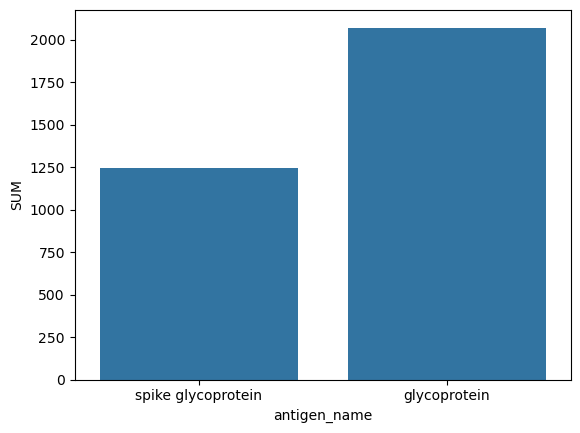

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtere den DataFrame
#df_filtered = df_ant_name_sum[df_ant_name_sum['heavy_subclass'] == 'IGHV1']

df_ant_name_sum_greater100 = df_ant_name_sum[df_ant_name_sum['SUM'] >= 1000]

# Erstellet den Barplot
sns.barplot(
    data=df_ant_name_sum_greater100,         # DataFrame
    x='antigen_name',              # x-Achse
    y='SUM',                   #  y-Achse
    #estimator='mean',         # Optionale Schätzung (Durchschnitt)
    #errorbar=('ci', 95),      # Fehlerbalken (Konfidenzintervall von 95%)
    orient='v'                # Vertikale Orientierung (horizontal h)
)

plt.show()  # Anzeigen des Plots
